In [114]:
df=pd.read_csv(r"C:\Users\91987\Desktop\Data Train\Dynamic Project\Covid/csse_covid_19_daily_reports_us.csv")

<IPython.core.display.Javascript object>

In [115]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [116]:
# checking null values

df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

<IPython.core.display.Javascript object>

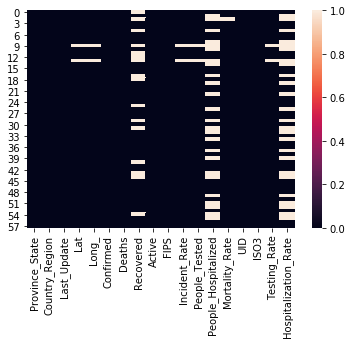

In [117]:
# visualising null values
sns.heatmap(df.isnull())

In [118]:
df.shape

(58, 18)

In [119]:
# Cheching the percent of null values of each columns with respect to dataset.

for i in df.columns:
    if df[i].isnull().sum() > 0:
        print("Percent of null values in column {0} is   ---- {1} " .format(i,((df[i].isnull().sum())/58)*100))      

Percent of null values in column Lat is   ---- 3.4482758620689653 
Percent of null values in column Long_ is   ---- 3.4482758620689653 
Percent of null values in column Recovered is   ---- 27.586206896551722 
Percent of null values in column Incident_Rate is   ---- 3.4482758620689653 
Percent of null values in column People_Tested is   ---- 3.4482758620689653 
Percent of null values in column People_Hospitalized is   ---- 43.103448275862064 
Percent of null values in column Mortality_Rate is   ---- 1.7241379310344827 
Percent of null values in column Testing_Rate is   ---- 3.4482758620689653 
Percent of null values in column Hospitalization_Rate is   ---- 43.103448275862064 


In [120]:
# Checking the unique values in each feature of dataset.
df.nunique()

Province_State          58
Country_Region           1
Last_Update              1
Lat                     56
Long_                   56
Confirmed               58
Deaths                  56
Recovered               42
Active                  58
FIPS                    58
Incident_Rate           56
People_Tested           56
People_Hospitalized     33
Mortality_Rate          57
UID                     58
ISO3                     6
Testing_Rate            56
Hospitalization_Rate    33
dtype: int64

In [121]:
# As we can see that Country_Region region and Last_Update have same values so we can drop these columns as the wont have any impact.
df.drop(['Country_Region','Last_Update'],axis=1,inplace=True)

In [122]:
df.shape

(58, 16)

In [123]:
df.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [124]:
# Cheching type of features in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Lat                   56 non-null     float64
 2   Long_                 56 non-null     float64
 3   Confirmed             58 non-null     int64  
 4   Deaths                58 non-null     int64  
 5   Recovered             42 non-null     float64
 6   Active                58 non-null     float64
 7   FIPS                  58 non-null     int64  
 8   Incident_Rate         56 non-null     float64
 9   People_Tested         56 non-null     float64
 10  People_Hospitalized   33 non-null     float64
 11  Mortality_Rate        57 non-null     float64
 12  UID                   58 non-null     int64  
 13  ISO3                  58 non-null     object 
 14  Testing_Rate          56 non-null     float64
 15  Hospitalization_Rate  33 

In [125]:
# From above we can see that there are two categorical features which needs to be treated.
# Using one hot encoding to treat categorical columns.
Province_State_n=pd.get_dummies(df['Province_State'],drop_first=True)

<IPython.core.display.Javascript object>

In [126]:
Province_State_n.head()

,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
# Now dropping column Province_State
df.drop(['Province_State'],axis=1,inplace=True)

In [128]:
ISO3_n=pd.get_dummies(df['ISO3'],drop_first=True)

<IPython.core.display.Javascript object>

In [129]:
ISO3_n.head()

,GUM,MNP,PRI,USA,VIR
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [130]:
df.drop(['ISO3'],axis=1,inplace=True)

__Now treating Missing Values.__

In [131]:
df.isnull().sum()

Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

 We Can not treat Latitude and Longitude column as they are unique values for evey observation so we can not replace them with
anything else. Hence we are leaving them blank.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C75FB27D48>,
      dtype=object)

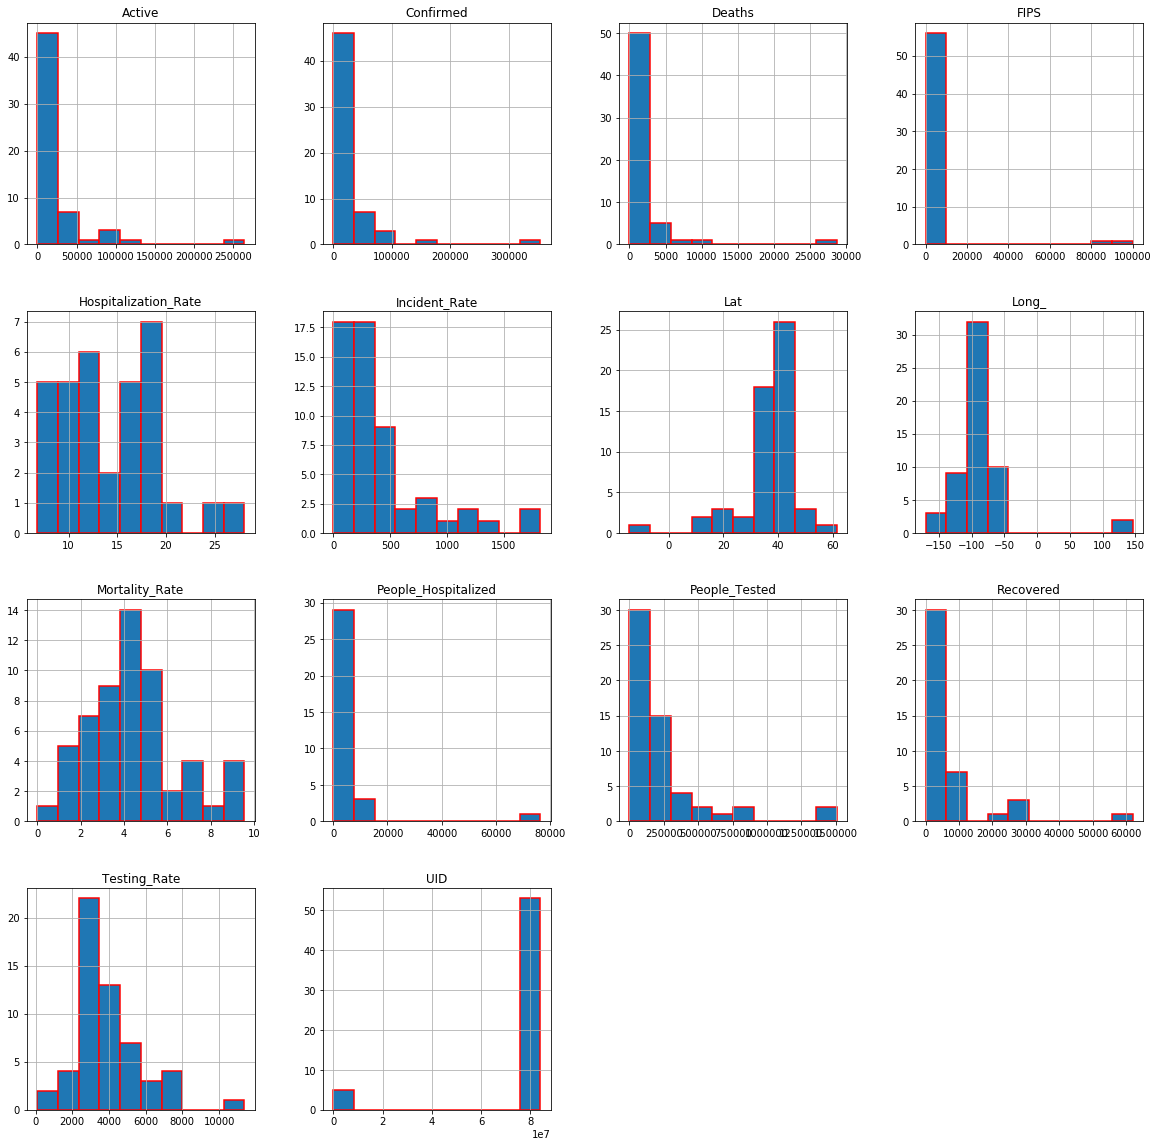

In [132]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

In [133]:
df.skew()

Lat                    -2.213092
Long_                   3.509241
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.136333
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.955650
People_Tested           2.783163
People_Hospitalized     5.290187
Mortality_Rate          0.492052
UID                    -3.027480
Testing_Rate            1.291806
Hospitalization_Rate    0.667943
dtype: float64

In [134]:
df.head()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
0,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,3353.942386,11.438860
1,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,5063.940017,NaN
2,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,222.857246,NaN
3,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,2272.859351,12.022005
4,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,3189.670370,10.693584


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

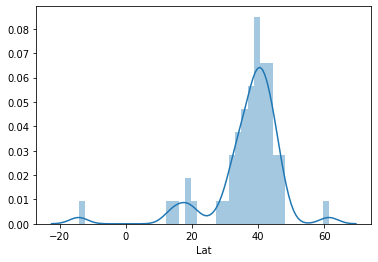

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

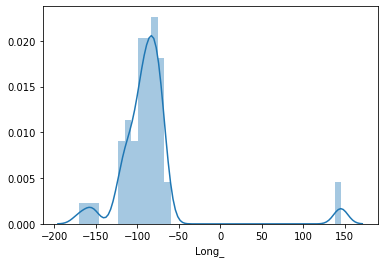

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

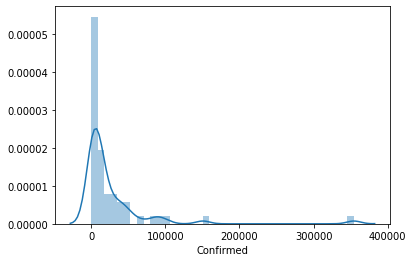

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

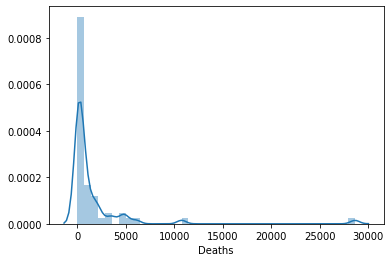

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

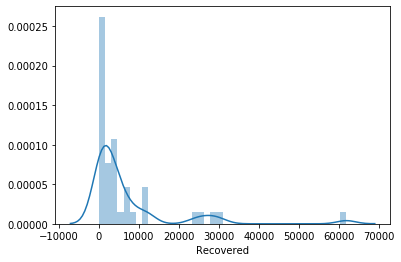

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

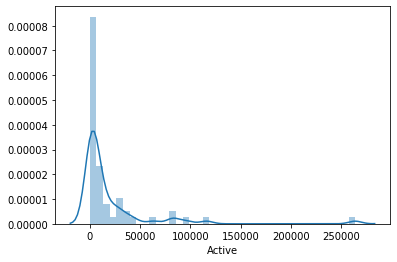

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

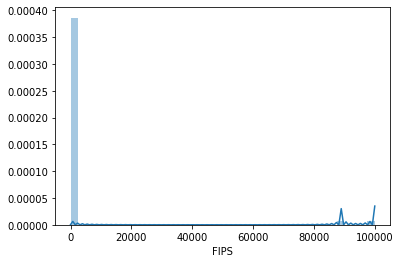

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

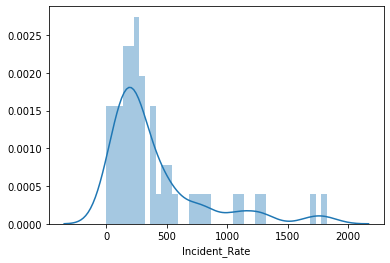

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

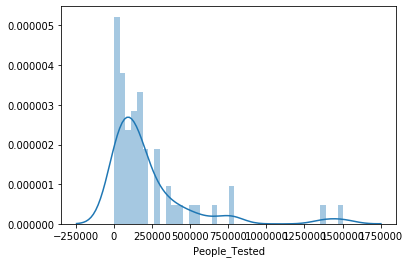

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

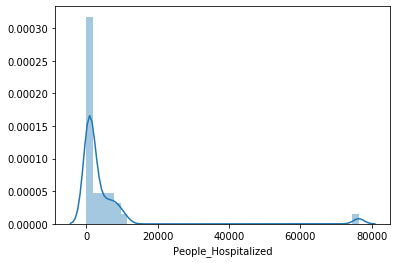

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

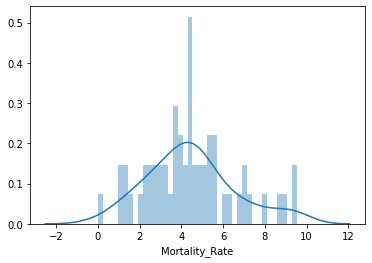

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

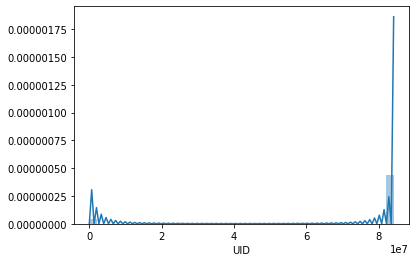

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

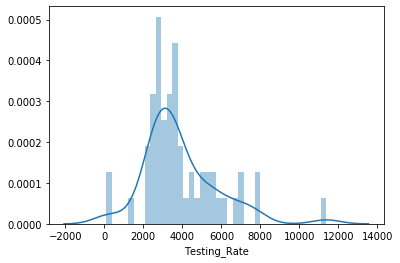

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

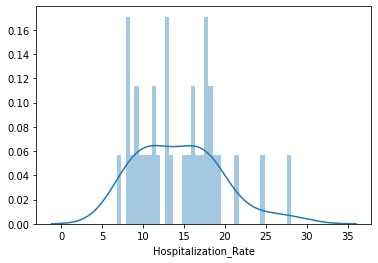

In [135]:
# Visualising the distribution in features.

for i in df.columns:
    sns.distplot(df[i].dropna(),bins=40)
    plt.show()
    #print(i)

 As there are no groups in dataset for treating the missing values so I am replacing the missing values with the mean for 
 every featrue

In [136]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i)
        

Lat
Long_
Recovered
Incident_Rate
People_Tested
People_Hospitalized
Mortality_Rate
Testing_Rate
Hospitalization_Rate


In [137]:
df['Recovered'].fillna((df['Recovered'].mean()), inplace=True)

In [138]:
df['Incident_Rate'].fillna((df['Incident_Rate'].mean()), inplace=True)

In [139]:
df['People_Tested'].fillna((df['People_Tested'].mean()), inplace=True)

In [140]:
df['People_Hospitalized'].fillna((df['People_Hospitalized'].mean()), inplace=True)

In [141]:
df['Mortality_Rate'].fillna((df['Mortality_Rate'].mean()), inplace=True)

In [142]:
df['Testing_Rate'].fillna((df['Testing_Rate'].mean()), inplace=True)

In [143]:
df['Hospitalization_Rate'].fillna((df['Hospitalization_Rate'].mean()), inplace=True)

In [158]:
# Replacing Lat and Long missing values with zero as Nan wont be accepted at time of model training.
df['Lat'] = df['Lat'].fillna(0)
df['Long_'] = df['Long_'].fillna(0)

In [159]:
df.isnull().sum()

Lat          0
Long_        0
Confirmed    0
Deaths       0
Recovered    0
            ..
GUM          0
MNP          0
PRI          0
USA          0
VIR          0
Length: 76, dtype: int64

__As we can see that we have treated missing values for every column except for Lat and Long__

__Now concatinating encoded columns with dataset__

In [147]:
df=pd.concat([df,Province_State_n,ISO3_n],axis=1)

<IPython.core.display.Javascript object>

In [148]:
df.head(15)

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,...,Virginia,Washington,West Virginia,Wisconsin,Wyoming,GUM,MNP,PRI,USA,VIR
0,32.3182,-86.9023,13052,522,7007.428571,12530.0,1,266.194321,1.644500e+05,1493.000000,...,0,0,0,0,0,0,0,0,1,0
1,61.3707,-152.4044,401,10,352.000000,39.0,2,54.815493,3.704500e+04,4897.454545,...,0,0,0,0,0,0,0,0,1,0
2,-14.2710,-170.1320,0,0,7007.428571,0.0,60,0.000000,1.240000e+02,4897.454545,...,0,0,0,0,0,0,0,0,0,0
3,33.7298,-111.4312,14906,747,3773.000000,10386.0,4,204.788838,1.654350e+05,1792.000000,...,0,0,0,0,0,0,0,0,1,0
4,34.9697,-92.3731,5003,107,3852.000000,1044.0,5,165.782801,9.625800e+04,535.000000,...,0,0,0,0,0,0,0,0,1,0
5,36.1162,-119.6816,85997,3497,7007.428571,82500.0,6,217.646575,1.380120e+06,4897.454545,...,0,0,0,0,0,0,0,0,1,0
6,39.0598,-105.3111,22797,1299,3478.000000,18020.0,8,395.868121,1.318370e+05,3955.000000,...,0,0,0,0,0,0,0,0,1,0
7,41.5978,-72.7554,39017,3529,6264.000000,29224.0,9,1094.357902,1.907180e+05,10946.000000,...,0,0,0,0,0,0,0,0,1,0
8,39.3185,-75.5071,8194,310,3965.000000,3919.0,10,841.476990,4.541200e+04,4897.454545,...,0,0,0,0,0,0,0,0,1,0
9,NaN,NaN,49,0,7007.428571,49.0,88888,396.230806,2.258534e+05,4897.454545,...,0,0,0,0,0,0,0,0,1,0


In [152]:
df.isnull().sum()


Lat          2
Long_        2
Confirmed    0
Deaths       0
Recovered    0
            ..
GUM          0
MNP          0
PRI          0
USA          0
VIR          0
Length: 76, dtype: int64

## Trying to find Deaths

In [216]:
x=df.drop("Deaths",axis=1)
x.head()

,Lat,Long_,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,...,Virginia,Washington,West Virginia,Wisconsin,Wyoming,GUM,MNP,PRI,USA,VIR
0,32.3182,-86.9023,13052,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,...,0,0,0,0,0,0,0,0,1,0
1,61.3707,-152.4044,401,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,...,0,0,0,0,0,0,0,0,1,0
2,-14.2710,-170.1320,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.458248,...,0,0,0,0,0,0,0,0,0,0
3,33.7298,-111.4312,14906,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,...,0,0,0,0,0,0,0,0,1,0
4,34.9697,-92.3731,5003,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,...,0,0,0,0,0,0,0,0,1,0


In [217]:
y=df['Deaths']
y.head()

0    522
1     10
2      0
3    747
4    107
Name: Deaths, dtype: int64

### Removing Skewness
__Our data is a lot skewed so we also have to treat skewness before applying ML__

In [218]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [219]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [174]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_t,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2) == round(r2_score(y_test,pred_test)*100,2):
        print( "At random state",  i,  "The model performs well")
        print("Training r2 score is ", r2_score(y_train,pred_train)*100)
        print("Testing r2 score is ", r2_score(y_test,pred_test)*100)
        print("---------------------------")

We can not find best random state so we are using it by our own

In [220]:
x_train,x_test,y_train,y_test = train_test_split(x_t,y,random_state=96,test_size=0.20)

In [221]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

### 1. Lasso Regression

In [222]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'random_state':list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [223]:
ls= Lasso(alpha=10, random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)



In [224]:
pred_ls=ls.predict(x_test)

In [225]:
lrs= r2_score(y_test,pred_decission)
print(lrs)

0.30903223204340613


### 2. Decission Tree

In [226]:
from sklearn.tree import DecisionTreeRegressor

parameters= {'criterion':['mse','friedman_mse','mae'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)


{'criterion': 'friedman_mse', 'splitter': 'best'}


In [227]:
# dt = DecisionTreeRegressor(criterion='mse', splitter='random')
# dt.fit(x_train_b,y_train_b)
# dt.score(x_train_b,y_train_b)
# pred_decission = dt.predict(x_test_b)

# dts= r2_score(y_test_b,pred_decission)
# print("r2 Score :", dts*100)

# dtscore= cross_val_score(dt,x_t,y,cv=3)
# dtc = dtscore.mean()
# print('Cross Validation score',dtc*100)

In [228]:
dt = DecisionTreeRegressor(criterion='mse', splitter='random')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decission = dt.predict(x_test)

In [229]:
dts= r2_score(y_test,pred_decission)
print(dts)

0.4785163166175733


### Using Random Forest

In [238]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['friedman_mse','mae'],'n_estimators':[100,200,300]}
rf=RandomForestRegressor()
clf= GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'n_estimators': 100}


In [241]:
rf = RandomForestRegressor(criterion='mae', n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_random = rf.predict(x_test)

In [242]:
r2_score(y_test,pred_random)

0.8662883655141486

### Best Model upto now is Random Forest so we will be using it for prediction

In [243]:
import pickle
filename='Covid_Death'
pickle.dump(rf,open(filename,'wb'))

# Trying to find Recoveries

In [244]:
x=df.drop("Recovered",axis=1)
x.head()

,Lat,Long_,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,...,Virginia,Washington,West Virginia,Wisconsin,Wyoming,GUM,MNP,PRI,USA,VIR
0,32.3182,-86.9023,13052,522,12530.0,1,266.194321,164450.0,1493.000000,3.999387,...,0,0,0,0,0,0,0,0,1,0
1,61.3707,-152.4044,401,10,39.0,2,54.815493,37045.0,4897.454545,2.493766,...,0,0,0,0,0,0,0,0,1,0
2,-14.2710,-170.1320,0,0,0.0,60,0.000000,124.0,4897.454545,4.458248,...,0,0,0,0,0,0,0,0,0,0
3,33.7298,-111.4312,14906,747,10386.0,4,204.788838,165435.0,1792.000000,5.011405,...,0,0,0,0,0,0,0,0,1,0
4,34.9697,-92.3731,5003,107,1044.0,5,165.782801,96258.0,535.000000,2.138717,...,0,0,0,0,0,0,0,0,1,0


In [245]:
y=df['Recovered']
y.head()

0    7007.428571
1     352.000000
2    7007.428571
3    3773.000000
4    3852.000000
Name: Recovered, dtype: float64

In [246]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [255]:
x_t=sc.fit_transform(x)

In [256]:
x_train,x_test,y_train,y_test = train_test_split(x_t,y,random_state=40,test_size=0.20)

In [257]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'random_state':list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [262]:
ls= Lasso(alpha=10, random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)


In [263]:
lrs= r2_score(y_test,pred_decission)
print(lrs)

-1.320298174757892


In [264]:
parameters = {'criterion':['friedman_mse','mae'],'n_estimators':[100,200,300]}
rf=RandomForestRegressor()
clf= GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'n_estimators': 100}


In [265]:
rf = RandomForestRegressor(criterion='friedman_mse', n_estimators=100)
rf.fit(x_train_b,y_train_b)
rf.score(x_train_b,y_train_b)
pred_random = rf.predict(x_test_b)


In [266]:
rfs= r2_score(y_test_b,pred_random)
print("r2 Score :", rfs*100)

r2 Score : 72.9254513268736


### In Finding Recoveries also Random Forest is performing well som3 we will be using it for prediction

In [267]:
import pickle
filename = 'Covid_recov.pkl'
pickle.dump(rf, open(filename, 'wb'))